# Módulo 6 tarefa 1

## 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

### Dados

In [1]:
# Importanto bibliotecas
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt

In [2]:
# Importando base de dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/b1abb33c4f.csv"
df = pd.read_csv(link)
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Verirficando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

### Dicionário de Variáveis

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_01.png?raw=true" >

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_02.png?raw=true" >

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_03.png?raw=true" >

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_04.png?raw=true" >



---



##  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [4]:
# Selecionando as variáveis de interesse
colunas = "APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE".split(", ")

# Instânciando um dicionário com a descrição das variáveis de interesse
colunas_descricao = {
    colunas[0]: "Apgar no primeiro minuto",
    colunas[1]: "Apgar no quinto minuto",
    colunas[2]: "Sexo",
    colunas[3]: "Semanas de gestação",
    colunas[4]: "Estado civil da mãe",
}

# Usando as variáveis para instânciar os dados de interesse.
df_filtro = df[colunas].copy()
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APGAR1     26932 non-null  float64
 1   APGAR5     26925 non-null  float64
 2   SEXO       27024 non-null  object 
 3   GESTACAO   25796 non-null  object 
 4   ESTCIVMAE  26711 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.0+ MB


In [5]:
# Verificando os valores da variável ESTCIVMAE
df_filtro[colunas[4]].value_counts()

2.0    9924
1.0    8952
5.0    7180
4.0     453
9.0     145
3.0      57
Name: ESTCIVMAE, dtype: int64

In [6]:
'''
Instânciando um dicionário com a descrição dos valores na variável ESTCIVMAE
de código para descrição.
Apenas o código 5.0 não está presente no dicionário original. Esse código foi
descrito como 'Não classificado'.
'''
estcivmae = {
    1.0: "Solteira",
    2.0: "Casada",
    3.0: "Viúva",
    4.0: "Separado judicialmente/Divorciado",
    5.0: "Não classificado",
    9.0: "Ignorado",
}

In [7]:
# Inserindo a nova variável às colunas
colunas.append('ESTCIVMAE_NOMINAL')

# e aou dicionário de descrição
colunas_descricao[colunas[5]] = "Estado civil da mãe"

# Substituindo os códigos pela descrição e instânciando uma nova variável
df_filtro[colunas[5]] = df_filtro['ESTCIVMAE'].replace(estcivmae)
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   APGAR1             26932 non-null  float64
 1   APGAR5             26925 non-null  float64
 2   SEXO               27024 non-null  object 
 3   GESTACAO           25796 non-null  object 
 4   ESTCIVMAE          26711 non-null  float64
 5   ESTCIVMAE_NOMINAL  26711 non-null  object 
dtypes: float64(3), object(3)
memory usage: 1.2+ MB


In [8]:
# Verificando os valores da variável ESTCIVMAE
df_filtro[colunas[5]].value_counts()

Casada                               9924
Solteira                             8952
Não classificado                     7180
Separado judicialmente/Divorciado     453
Ignorado                              145
Viúva                                  57
Name: ESTCIVMAE_NOMINAL, dtype: int64

<ipython-input-9-1d21c553da59>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f1 = sns.countplot(x=colunas[0], data=df_filtro, ax=ax[0,0], palette = "Set1")
<ipython-input-9-1d21c553da59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f2 = sns.countplot(x=colunas[1], data=df_filtro, ax=ax[0,1], palette = "Set1")
<ipython-input-9-1d21c553da59>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f3 = sns.countplot(x=colunas[2], data=df_filtro, ax=ax[0,2], palette = "Set1")
<ipython-input-9-1d21c553da59>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

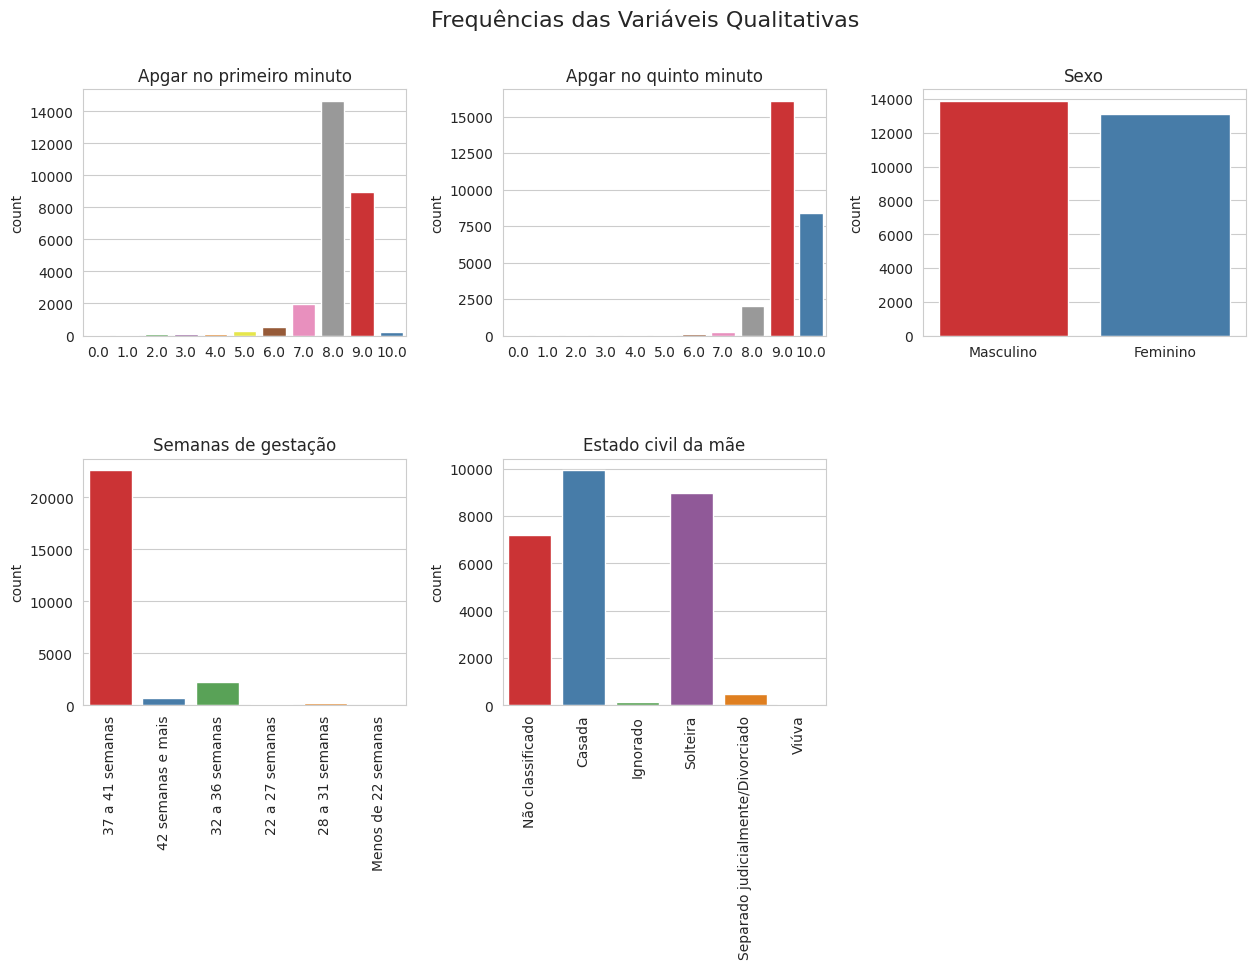

In [9]:
# Instanciando os gráficos
fig, ax = plt.subplots(2,3, figsize=(15,8))
fig.delaxes(ax[1,2])

plt.suptitle('Frequências das Variáveis Qualitativas', size=16)

f1 = sns.countplot(x=colunas[0], data=df_filtro, ax=ax[0,0], palette = "Set1")
f2 = sns.countplot(x=colunas[1], data=df_filtro, ax=ax[0,1], palette = "Set1")
f3 = sns.countplot(x=colunas[2], data=df_filtro, ax=ax[0,2], palette = "Set1")
f4 = sns.countplot(x=colunas[3], data=df_filtro, ax=ax[1,0], palette = "Set1")
f5 = sns.countplot(x=colunas[5], data=df_filtro, ax=ax[1,1], palette = "Set1")

f1.set(title=colunas_descricao[colunas[0]], xlabel="")
f2.set(title=colunas_descricao[colunas[1]], xlabel="")
f3.set(title=colunas_descricao[colunas[2]], xlabel="")
f4.set(title=colunas_descricao[colunas[3]], xlabel="")
f5.set(title=colunas_descricao[colunas[5]], xlabel="")

ax[1,0].tick_params(rotation=90, axis="x")
ax[1,1].tick_params(rotation=90, axis="x")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

[]

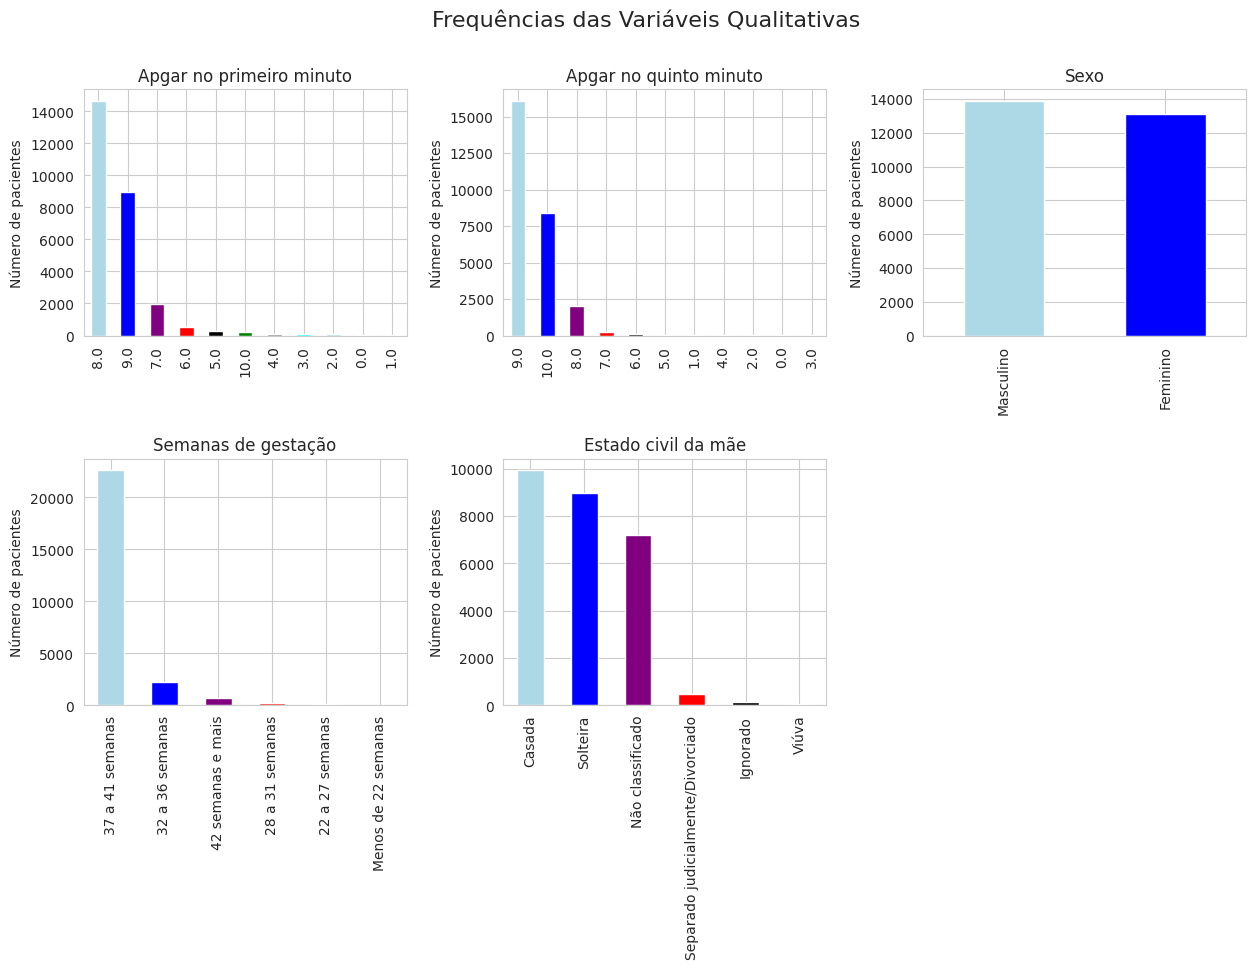

In [10]:
# Pela mensagem de aviso recebido no código anterior, novos gráficos foram instânciados
color = ['lightblue', 'blue', 'purple', 'red', 'black', 'green', 'grey', 'cyan']
fig, ax = plt.subplots(2,3, figsize=(15,8))
fig.delaxes(ax[1,2])

plt.suptitle('Frequências das Variáveis Qualitativas', size=16)

f1 = df_filtro[colunas[0]].value_counts().plot.bar(color=color, ax=ax[0,0])
f2 = df_filtro[colunas[1]].value_counts().plot.bar(color=color, ax=ax[0,1])
f3 = df_filtro[colunas[2]].value_counts().plot.bar(color=color, ax=ax[0,2])
f4 = df_filtro[colunas[3]].value_counts().plot.bar(color=color, ax=ax[1,0])
f5 = df_filtro[colunas[5]].value_counts().plot.bar(color=color, ax=ax[1,1])

f1.set(title=colunas_descricao[colunas[0]], xlabel="", ylabel="Número de pacientes")
f2.set(title=colunas_descricao[colunas[1]], xlabel="", ylabel="Número de pacientes")
f3.set(title=colunas_descricao[colunas[2]], xlabel="", ylabel="Número de pacientes")
f4.set(title=colunas_descricao[colunas[3]], xlabel="", ylabel="Número de pacientes")
f5.set(title=colunas_descricao[colunas[5]], xlabel="", ylabel="Número de pacientes")

ax[1,0].tick_params(rotation=90, axis="x")
ax[1,1].tick_params(rotation=90, axis="x")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.plot()



---



## 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [11]:
# Agrupando as informações de CONSULTAS pela média de APGAR5
df_medio = df[['APGAR5','CONSULTAS']].groupby("CONSULTAS").mean().reset_index()
df_medio

,CONSULTAS,APGAR5
0,1,8.981481
1,2,9.057395
2,3,9.154440
3,4,9.207188
4,9,8.860000


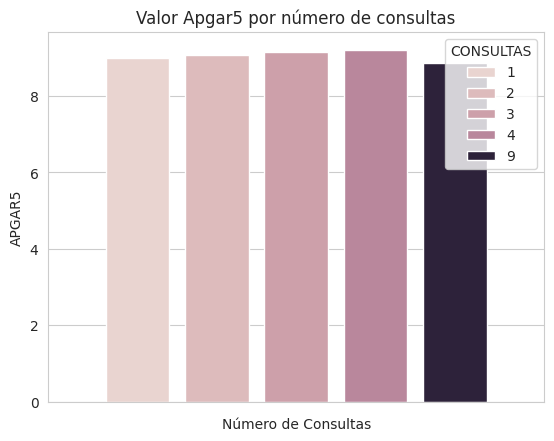

In [12]:
# Instânciando gráfico de barras
f = sns.barplot(hue='CONSULTAS', y="APGAR5", data=df_medio, gap=0.2)

f.set(
    title="Valor Apgar5 por número de consultas",
    xlabel="Número de Consultas"
)

plt.show()



---



##  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

In [13]:
# Selecionando as variáveis de interesse
colunas = "SEXO, GESTACAO, ESTCIVMAE, CONSULTAS".split(", ")

# Instânciando um dicionário com a descrição das variáveis de interesse
colunas_descricao = {
    colunas[0]: "Sexo",
    colunas[1]: "Semanas de gestação",
    colunas[2]: "Estado civil da mãe",
    colunas[3]: "Número de consultas",
}

# Usando as variáveis para instânciar os dados de interesse.
df_filtro = df[colunas].copy()
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEXO       27024 non-null  object 
 1   GESTACAO   25796 non-null  object 
 2   ESTCIVMAE  26711 non-null  float64
 3   CONSULTAS  27028 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 844.8+ KB


In [14]:
# Inserindo a nova variável às colunas
colunas.append('ESTCIVMAE_NOMINAL')

# e aou dicionário de descrição
colunas_descricao[colunas[4]] = "Estado civil da mãe"

# Substituindo os códigos pela descrição e instânciando uma nova variável
df_filtro[colunas[4]] = df_filtro['ESTCIVMAE'].replace(estcivmae)
df_filtro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEXO               27024 non-null  object 
 1   GESTACAO           25796 non-null  object 
 2   ESTCIVMAE          26711 non-null  float64
 3   CONSULTAS          27028 non-null  int64  
 4   ESTCIVMAE_NOMINAL  26711 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


In [15]:
# Verificando os valores da variável ESTCIVMAE
df_filtro[colunas[4]].value_counts()

Casada                               9924
Solteira                             8952
Não classificado                     7180
Separado judicialmente/Divorciado     453
Ignorado                              145
Viúva                                  57
Name: ESTCIVMAE_NOMINAL, dtype: int64

<ipython-input-16-bd1f35e673b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f1 = sns.countplot(x=colunas[0], data=df_filtro, ax=ax[0,0], palette = "Set1")
<ipython-input-16-bd1f35e673b2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f4 = sns.countplot(x=colunas[3], data=df_filtro, ax=ax[0,1], palette = "Set1")
<ipython-input-16-bd1f35e673b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f3 = sns.countplot(x=colunas[4], data=df_filtro, ax=ax[1,0], palette = "Set1")
<ipython-input-16-bd1f35e673b2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

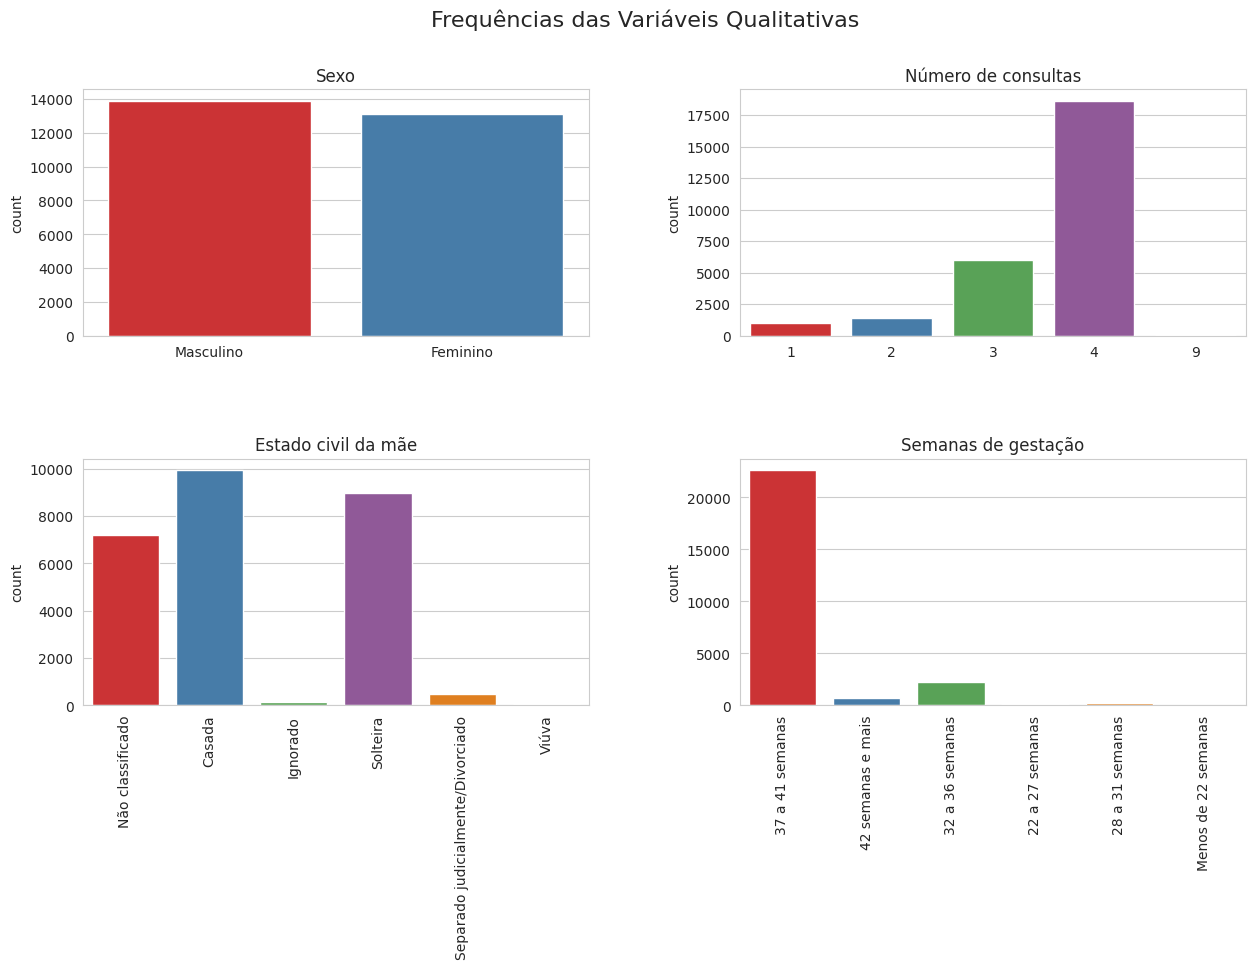

In [16]:
# Instanciando os gráficos
fig, ax = plt.subplots(2,2, figsize=(15,8))

plt.suptitle('Frequências das Variáveis Qualitativas', size=16)

f1 = sns.countplot(x=colunas[0], data=df_filtro, ax=ax[0,0], palette = "Set1")
f4 = sns.countplot(x=colunas[3], data=df_filtro, ax=ax[0,1], palette = "Set1")
f3 = sns.countplot(x=colunas[4], data=df_filtro, ax=ax[1,0], palette = "Set1")
f2 = sns.countplot(x=colunas[1], data=df_filtro, ax=ax[1,1], palette = "Set1")

f1.set(title=colunas_descricao[colunas[0]], xlabel="")
f4.set(title=colunas_descricao[colunas[3]], xlabel="")
f3.set(title=colunas_descricao[colunas[4]], xlabel="")
f2.set(title=colunas_descricao[colunas[1]], xlabel="")

ax[1,0].tick_params(rotation=90, axis="x")
ax[1,1].tick_params(rotation=90, axis="x")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

[]

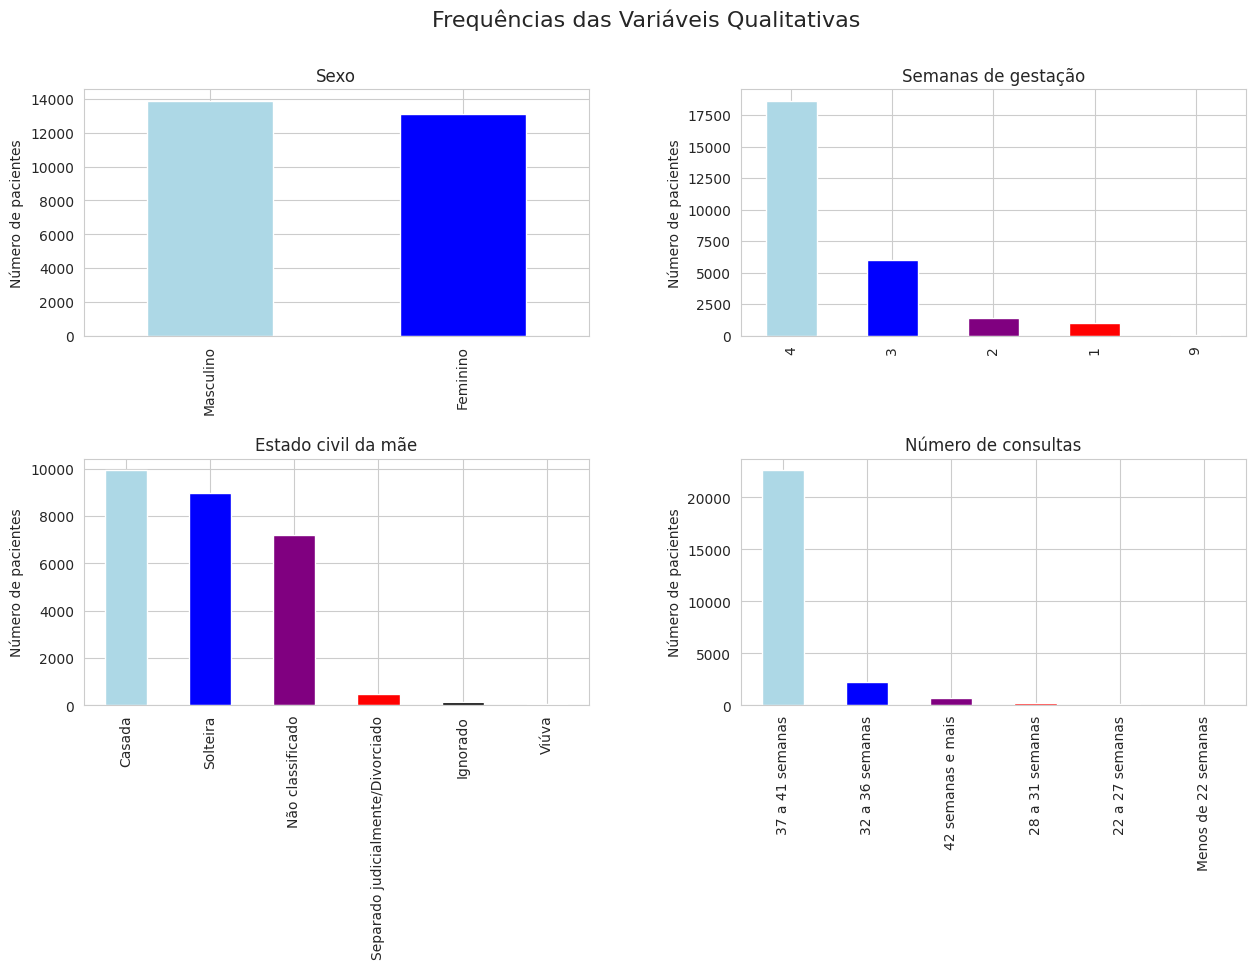

In [17]:
# Pela mensagem de aviso recebido no código anterior, novos gráficos foram instânciados
fig, ax = plt.subplots(2,2, figsize=(15,8))

plt.suptitle('Frequências das Variáveis Qualitativas', size=16)

f1 = df_filtro[colunas[0]].value_counts().plot.bar(color=color, ax=ax[0,0])
f4 = df_filtro[colunas[3]].value_counts().plot.bar(color=color, ax=ax[0,1])
f3 = df_filtro[colunas[4]].value_counts().plot.bar(color=color, ax=ax[1,0])
f2 = df_filtro[colunas[1]].value_counts().plot.bar(color=color, ax=ax[1,1])

f1.set(title=colunas_descricao[colunas[0]], xlabel="", ylabel="Número de pacientes")
f2.set(title=colunas_descricao[colunas[3]], xlabel="", ylabel="Número de pacientes")
f3.set(title=colunas_descricao[colunas[4]], xlabel="", ylabel="Número de pacientes")
f4.set(title=colunas_descricao[colunas[1]], xlabel="", ylabel="Número de pacientes")

plt.subplots_adjust(wspace=0.3, hspace=0.5)

ax[1,0].tick_params(rotation=90, axis="x")
ax[1,1].tick_params(rotation=90, axis="x")

plt.plot()